In [1]:
import cv2, sys
import matplotlib.pyplot as plt
import numpy as np

C:\Users\lemon\anaconda3\envs\project-env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lemon\anaconda3\envs\project-env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\lemon\anaconda3\envs\project-env\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [35]:
image_general = cv2.imread("C:/test_image/super_general1.jpg", cv2.IMREAD_UNCHANGED)
image_gray_general = cv2.imread("C:/test_image/super_general1.jpg", cv2.IMREAD_GRAYSCALE)

image_general = cv2.resize(image_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)
image_gray_general = cv2.resize(image_gray_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)

cv2.imshow('image', image_general)
cv2.imshow('image_gray', image_gray_general)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


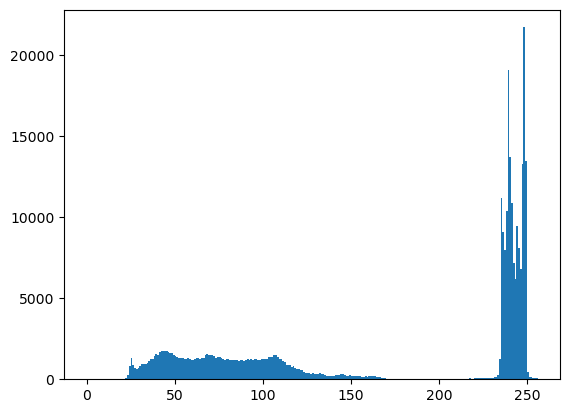

In [3]:
plt.hist(image_gray_general.ravel(), 256, [0, 256])
plt.show()

In [17]:
image_gray_general.ravel()

array([242, 242, 242, ..., 235, 235, 235], dtype=uint8)

In [22]:
import collections

In [24]:
ravel_array = collections.Counter(image_gray_general.ravel())

In [25]:
ravel_array

Counter({242: 7170,
         243: 6214,
         245: 8083,
         246: 6805,
         244: 9440,
         247: 13268,
         248: 21727,
         249: 13450,
         250: 474,
         241: 10899,
         252: 126,
         255: 49,
         234: 1222,
         229: 73,
         225: 64,
         223: 58,
         221: 55,
         217: 53,
         236: 9070,
         251: 171,
         235: 11183,
         218: 38,
         202: 46,
         192: 20,
         178: 30,
         165: 161,
         156: 160,
         150: 199,
         147: 233,
         145: 313,
         155: 179,
         161: 190,
         170: 42,
         187: 23,
         220: 51,
         233: 244,
         240: 13710,
         253: 50,
         186: 26,
         157: 155,
         123: 445,
         115: 882,
         102: 1271,
         92: 1207,
         87: 1197,
         85: 1220,
         86: 1154,
         98: 1207,
         103: 1348,
         112: 1088,
         131: 325,
         177: 45,
      

In [28]:
ravel_dict = sorted(ravel_array.items(), key= lambda x : x[1],reverse = True)

In [29]:
ravel_dict

[(248, 21727),
 (239, 19117),
 (240, 13710),
 (249, 13450),
 (247, 13268),
 (235, 11183),
 (241, 10899),
 (238, 10356),
 (244, 9440),
 (236, 9070),
 (245, 8083),
 (237, 7950),
 (242, 7170),
 (246, 6805),
 (243, 6214),
 (44, 1752),
 (43, 1739),
 (45, 1728),
 (42, 1726),
 (46, 1714),
 (41, 1654),
 (48, 1638),
 (47, 1620),
 (39, 1560),
 (68, 1539),
 (69, 1522),
 (49, 1513),
 (40, 1513),
 (67, 1493),
 (70, 1478),
 (107, 1476),
 (71, 1469),
 (106, 1469),
 (72, 1439),
 (50, 1430),
 (38, 1416),
 (75, 1394),
 (104, 1389),
 (105, 1378),
 (74, 1376),
 (108, 1364),
 (51, 1350),
 (103, 1348),
 (66, 1339),
 (76, 1335),
 (53, 1334),
 (54, 1328),
 (52, 1324),
 (25, 1317),
 (62, 1306),
 (57, 1300),
 (65, 1293),
 (73, 1291),
 (63, 1287),
 (95, 1275),
 (64, 1274),
 (110, 1274),
 (61, 1272),
 (101, 1272),
 (102, 1271),
 (109, 1268),
 (55, 1265),
 (91, 1261),
 (77, 1257),
 (36, 1252),
 (80, 1251),
 (100, 1247),
 (99, 1244),
 (96, 1240),
 (37, 1237),
 (93, 1236),
 (56, 1232),
 (79, 1228),
 (58, 1228),
 (23

In [34]:
blur_general = cv2.GaussianBlur(image_gray_general, ksize=(11,11), sigmaX=2)
ret, thresh1 = cv2.threshold(blur_general, 200, 255, cv2.THRESH_BINARY)

cv2.imshow('thresh1', thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
edged_general = cv2.Canny(thresh1, 10, 250)
contour_general = image_general.copy()

cv2.imshow('edged_general', edged_general)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closed_general = cv2.morphologyEx(edged_general, cv2.MORPH_CLOSE , kernel)

contours, hierarchy = cv2.findContours(closed_general,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
final_result = cv2.drawContours(contour_general, contours, -1, (0,255,0), 3)

cv2.imshow('final_result', final_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import os

In [9]:
new_foler="C:/test_image"
new_file_list = [x for x in os.listdir(new_foler)]

In [15]:
from tqdm import tqdm
time=0
for i in tqdm(range(150)):
    image_general = cv2.imread("C:/test_image/" + new_file_list[i], cv2.IMREAD_UNCHANGED)
    image_gray_general = cv2.imread("C:/test_image/" + new_file_list[i], cv2.IMREAD_GRAYSCALE)
    
    image_general = cv2.resize(image_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)
    image_gray_general = cv2.resize(image_gray_general, dsize=(480, 640), interpolation=cv2.INTER_AREA)
    
    blur_general = cv2.GaussianBlur(image_gray_general, ksize=(7,7), sigmaX=3)
    ret, thresh1 = cv2.threshold(blur_general, 200, 255, cv2.THRESH_BINARY)
    edged_general = cv2.Canny(thresh1, 10, 250)
    contour_general = image_general.copy()
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    closed_general = cv2.morphologyEx(edged_general, cv2.MORPH_CLOSE , kernel)
    
    contours, hierarchy = cv2.findContours(closed_general,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    final_result = cv2.drawContours(contour_general, contours, -1, (0,255,0), 3)
    
    contours_xy = np.array(contours)
    
    for j in range(len(contours_xy)):
        x_min, x_max = 0,0
        y_min, y_max = 0,0
        x_value = list()
        y_value = list()

        for k in range(len(contours_xy[j])):
            x_value.append(contours_xy[j][k][0][0]) #네번째 괄호가 0일때 x의 값
            y_value.append(contours_xy[j][k][0][1]) #네번째 괄호가 0일때 x의 값

        x_min = min(x_value)
        x_max = max(x_value)
        y_min = min(y_value)
        y_max = max(y_value)

        x = x_min
        y = y_min
        w = x_max-x_min
        h = y_max-y_min


        if w<250 or h<250:
            pass
        else:
            time+=1
            img_trim = image_general[y:y+h, x:x+w]
            cv2.imwrite("C:/detecting_image/real_general" + str(time) + ".jpg", img_trim)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 76.87it/s]
